In [131]:
%pylab inline
import numpy as np
import pandas as pd
import os

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [132]:
DATA_FOLDER = "data/"
MODEL_FOLDER = "models/hw_regular/"
OUTPUT_FOLDER = "outputs/"
TRAIN_FILE_PATH = DATA_FOLDER + "train.csv"
TEST_FILE_PATH = DATA_FOLDER + "test_X.csv"

In [133]:
if not os.path.exists(MODEL_FOLDER):
    os.makedirs(MODEL_FOLDER)

In [134]:
# read train data
train_data = pd.read_csv(TRAIN_FILE_PATH, header=0, encoding="big5")

In [135]:
# preprocess train data
train_data[train_data=="NR"] = 0

In [136]:
train_data.head(18)

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


In [137]:
# concat 20 days data
train_array_months = []  # 12 numpy.array, array's shape is (18, 480)
for month in range(12):
    temp_train_array = np.concatenate( [train_data[(360*month+18*day):(360*month+18*(day+1))][list(range(3, 27))].apply(pd.to_numeric).as_matrix() for day in range(20)], axis=1)
    train_array_months.append(temp_train_array)

In [138]:
# use part of data
x_row_idxs = [1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13]  # > 0.2
x_row_num = len(x_row_idxs)
x_col_num = 9

train_array_months_processed = [train_array_months[month][x_row_idxs, :] for month in range(12)]

## Train

In [139]:
w = np.random.randn(x_row_num, x_col_num)
b = np.random.randn()

In [140]:
prev_loss = np.inf

In [141]:
# momentum
gamma = 0.9
vb = 0
vw = np.zeros((x_row_num, x_col_num))

In [142]:
# b = np.random.randn()
# w = np.random.randn(x_row_num, x_col_num)

In [143]:
lr = 4 * 10**(-9)

In [144]:
# # load model
# model = np.load(MODEL_FOLDER + 'epo2100_los4.9199.npz')
# w = model['w']
# b = model['b']
# vb = model['vb']
# vw = model['vw']
# lr = model['lr']
# total_epoch = model['total_epoch']

In [145]:
init_b = np.random.randn()
init_w = np.random.randn(x_row_num, x_col_num)

In [155]:
_lambdas = [0, 1, 10, 100, 1000, 10000, 100000, 1000000]

In [156]:
losses_by_lambda = []
w_list = []
b_list = []
epoch_list = []

for _lambda in _lambdas:
    print("training with lambda =", _lambda)
    losses = []
    total_epoch = 0
    b = init_b
    w = init_w
    
#     for epoch in range(1000):
    while True:
        # one training epoch

        # reset temp variables 
        loss = 0
        b_grad = 0
        w_grad = np.zeros((x_row_num, x_col_num))

        # calculate loss and gradient over all training data
        for month in range(12):
            for hour in range(470):
                # extract x and y from training data
                # train_array_months is a list of 12 arrays
                # x will be an ?x9 numpy array. '?' depends on how we process training data
                x = train_array_months_processed[month][:, hour:hour+9]
                y_data = train_array_months[month][9, hour+9]

                # calculate y from x, w, b
                y_pred= einsum('ij,ij', x, w) + b

                # update loss
                diff = y_data - y_pred
                loss += diff * diff

                # update gradient of b and w
                mult = 2 * diff * (-1)
                b_grad += mult
                w_grad += mult * x  # 2 * diff * (-1) * x

        w_grad += 2 * _lambda * w

        # calculate rms error
        loss = sqrt(loss/(12*470))
        losses.append(loss)

        if total_epoch % 100 == 0:
            print(total_epoch, loss)
        

        # save model
#         if total_epoch % 1000 == 0:
#             model_file_info = "lambda" + str(_lambda) + "_epo" + str(total_epoch) + "_los" + str(loss)[:6]
#             print(model_file_info)
#             np.savez(MODEL_FOLDER + model_file_info, b=b, w=w, vb=vb, vw=vw, lr=lr, total_epoch=total_epoch)

        # stop training in some cases
        if total_epoch >= 1000:
            break

        # update parameters
        vb = lr * b_grad + gamma * vb
        vw = lr * w_grad + gamma * vw
        b = b - vb
        w = w - vw
        total_epoch += 1

    model_file_info = "lambda" + str(_lambda) + "_epo" + str(total_epoch) + "_los" + str(loss)[:6]
    print(model_file_info)
    np.savez(MODEL_FOLDER + model_file_info, b=b, w=w, vb=vb, vw=vw, lr=lr, total_epoch=total_epoch)

    w_list.append(w)
    b_list.append(b)
    epoch_list.append(total_epoch)
    
    losses_by_lambda.append(losses)

print('end of training')

training with lambda = 1
0 268.72642196
100 11.2101944262
200 8.66677745043
300 7.76444176172
400 7.35288341391
500 7.11306459562
600 6.94608375009
700 6.81745209262
800 6.71286751538
900 6.62519597305
1000 6.55028123103
lambda1_epo1000_los6.5502
training with lambda = 10
0 268.72642196
100 11.2013992729
200 8.65784550661
300 7.75622285588
400 7.34548344455
500 7.10639704609
600 6.94004117351
700 6.81194142039
800 6.70781262584
900 6.62053470339
1000 6.54596231391
lambda10_epo1000_los6.5459
training with lambda = 100
0 268.72642196
100 11.1961709332
200 8.65168414142
300 7.74945967298
400 7.33796958918
500 7.09813250199
600 6.9311213185
700 6.80248453841
800 6.69792974705
900 6.61032115767
1000 6.53549719225
lambda100_epo1000_los6.5354
training with lambda = 1000
0 268.72642196
100 11.1439265294
200 8.59055523537
300 7.68289132356
400 7.26461092173
500 7.01809227966
600 6.84542142639
700 6.71234401158
800 6.60447325344
900 6.51450176762
1000 6.43809583065
lambda1000_epo1000_los6.4380
e

## Plot

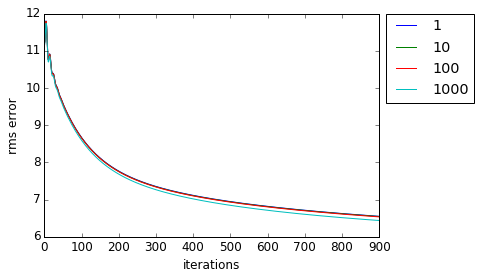

In [157]:
# log_losses_by_lr = [np.log(losses) for losses in losses_by_lr]

rcParams.update({'font.size': 12})
figure(figsize=(6, 4), dpi=240, edgecolor='k')

for i in range(len(losses_by_lambda)):
    plot(losses_by_lambda[i][100:], label=str(_lambdas[i]))

ylabel('rms error')
xlabel('iterations')
legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)

## Test

In [158]:
test_data = pd.read_csv(TEST_FILE_PATH, header=None, encoding="big5")
test_data[test_data=="NR"] = 0
test_array = test_data[:][list(range(2, 11))].apply(pd.to_numeric).as_matrix()
data_num = 240

In [159]:
x_test_arrays = []
for data_idx in range(data_num):
    row_start_idx = data_idx*18
    this_row_idxs = [row_start_idx+i for i in x_row_idxs]
    this_extr_rows = test_array[this_row_idxs, :]
    x_test_arrays.append(this_extr_rows)

In [160]:
_id = pd.Series(["id_" + str(i) for i in range(data_num)])

In [161]:
# # load model
# model_file = 'epo1532682_los5.7251.npz'
# model = np.load(MODEL_FOLDER + model_file)
# w = model['w']
# b = model['b']
# model_file_info = model_file[:-4]

In [162]:
for i in range(len(_lambdas)):
    w = w_list[i]
    b = b_list[i]
    
    # calc y
    y_preds = []
    for dataIdx in range(data_num):
        x = x_test_arrays[dataIdx]
        y_pred = einsum('ij,ij', x, w) + b
        y_preds.append(y_pred)
    y_pred_series = pd.Series(y_preds)

    # concat id and y
    output = pd.concat([_id, y_pred_series], axis=1)
    output.columns=["id","value"]

    # set as 0 if value < 0
#     output.ix[output["value"] < 0, ["value"]] = 0

    # write file
    output.to_csv(OUTPUT_FOLDER + "output_hw_regular_lambda" + str(_lambdas[i]) + "_loss" + str(losses_by_lambda[i][-1]) + ".csv", index=False)
#     output.to_csv("linear_regression.csv", index=False)